# **Imports**

In [ ]:
import pandas as pd
import numpy as np 
from numpy import log,dot,e,shape
import matplotlib.pyplot as plt

In [ ]:
from math import exp

# **Globals:**

Below is the dataset being used. In this senario is it based on X (student styudying neglect) and Y (whether they passed or failed). Y = 1 represents the fact that the student failed. 

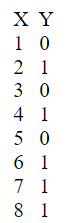

In [ ]:
training_set = {'X': [1, 2, 3, 4, 5, 6, 7, 8],
                'Y': [0, 1, 0, 1, 0, 1, 1, 1]}

Initialize the dataframe

In [ ]:
starting_df = pd.DataFrame(training_set, columns = ['X', 'Y'])

In [ ]:
initial_weights = [0.5, 0.5]
    
learning_rate = 0.01
    
number_of_updates = 1000

# **Definitions:**

Normalization by Subtracting the Mean 

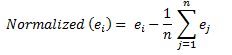

In [ ]:
def normalize_function(X):
    return X - X.mean()

**Logistic Function** to predict probabilities.

> The sigmpoid function will map any real value into another value between 0 and 1

> **b0** is the intercept of the regression line (predicted value when x = 0)

> **b1** is the slope of the regression line





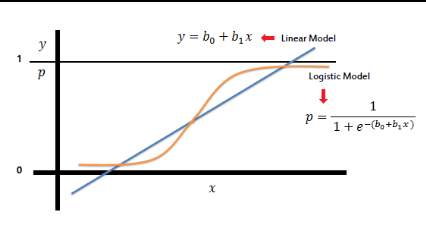

In [ ]:
def logistic_function(X, b0, b1):
    return np.array([ 1 / (1 + exp(-1*b0 + -1*b1*x)) for x in X])

**Gradient Descent Alogrithm**


> Estimate the weights of the model. The output is dependent on a single x feature.



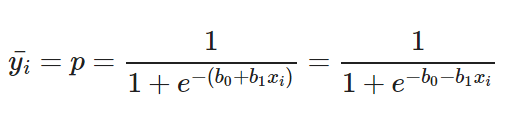

Calculate the derivative with respect to b0 and b1. The value of the partial derivative will tell how far the function is from its minimum. To measure how much the weights need to be updated to attain min error (ideally 0). 

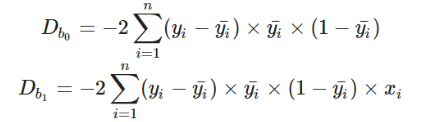

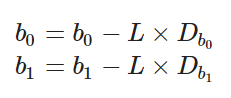

Repeated based on the number of updates. 

In [ ]:
def Gradient_Descent_algo(X, Y):

    X = normalize_function(X)

    # Initial weights
    b0 = initial_weights[0]
    b1 = initial_weights[1]

    # Set L to the learning rate
    L  = learning_rate

    # Set iterations to the number of updates 
    iterations = number_of_updates

    # Calculate the derivatives with respect to b1 and b0
    for _ in range(iterations):

        y_predicted = logistic_function(X, b0, b1)

        Derivative_b0 = -2 * sum((Y - y_predicted) * y_predicted * (1 - y_predicted))  
        Derivative_b1 = -2 * sum(X * (Y - y_predicted) * y_predicted * (1 - y_predicted))  

        # Update the weights
        b0 = b0 - L * Derivative_b0
        b1 = b1 - L * Derivative_b1
    
    return b0, b1

# **Code:**


> Put weights into the model and update them.


> Make predictions with the desired threshold.


> The solution quality is based on how many correct predictions divide by the total number of test cases. This is also the accuracy. 







In [ ]:
# Train the model by calling the gradient descent algorithm with the starting dataframe (starting values)
b0, b1 = Gradient_Descent_algo(starting_df["X"], starting_df["Y"])

# Call normalized values
X_test_normlized = normalize_function(starting_df["X"])

# Make predictions
y_predicted = logistic_function(X_test_normlized, b0, b1)

starting_df = pd.DataFrame()

# Create the final solution vector
y_predicted = [1 if p >= 0.5 else 0 for p in y_predicted]

# Visualize the prediced values
trained_set = {'X': [1, 2, 3, 4, 5, 6, 7, 8],
               'y_predicted': y_predicted}

# Create final dataframe
final_df = pd.DataFrame(trained_set, columns = ['X', 'y_predicted'])

# Getting the solution accuracy (quality)
solution_accuracy = 0

for i in range(len(y_predicted)):
    if y_predicted[i] == training_set["Y"][i]:
        solution_accuracy += 1
        
solution_accuracy = solution_accuracy/ len(y_predicted)

# **Results:**

Visualize the actual values vs the prediced values.

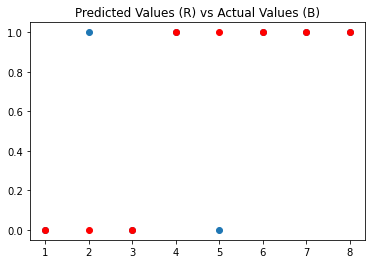

In [ ]:
plt.scatter(training_set["X"], training_set["Y"])                  
plt.scatter(training_set["X"], y_predicted, c="red")               

plt.title(label="Predicted Values (R) vs Actual Values (B)")
plt.show()

# **Report:**

 **Part A**
*   (i) the initial choice of the weights
*   (ii) the learning rate constant
*   (iii) the total number of weight vector updates before your algorithm stops
*   (iv) your final solution
*   (v) the quality of the final solution (briefly explain what you meant by the “quality” of a solution)



In [ ]:
print("Initial weights: ", initial_weights)
    
print("\n\nLearning rate used: ", learning_rate)
    
print("\n\nWeight vector updates: ", number_of_updates)
    
print("\n\nFinal solution:\n", final_df)

print("\n\nThe solution quality: ", solution_accuracy)
print("\n\nThe solution quality is essentially the solution accuracy, or how many points were" 
      "\npredicted correctly. How accuractly does our solution match with the actual Y values." )

Initial weights:  [0.5, 0.5]


Learning rate used:  0.01


Weight vector updates:  1000


Final solution:
    X  y_predicted
0  1            0
1  2            0
2  3            0
3  4            1
4  5            1
5  6            1
6  7            1
7  8            1


The solution quality:  0.75


The solution quality is essentially the solution accuracy, or how many points were
predicted correctly. How accuractly does our solution match with the actual Y values.


**Part B**

> Show outputs from different 
independent runs where the runs use different learning rates but the same initialization to zeros



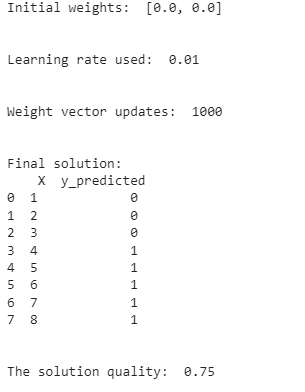

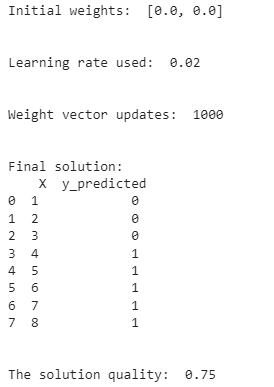

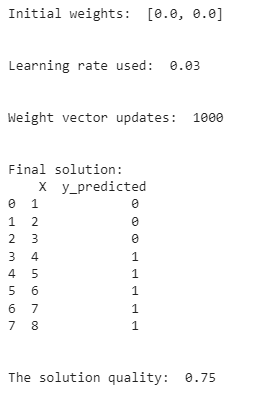

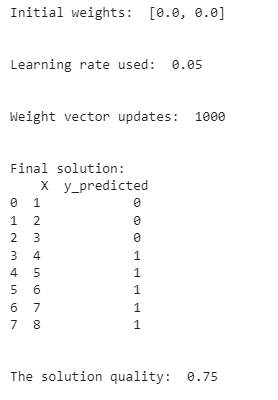

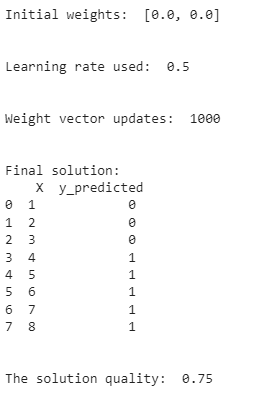

**Part C**


> Show outputs from different independent runs where the runs use the same learning rate constant but different initializations



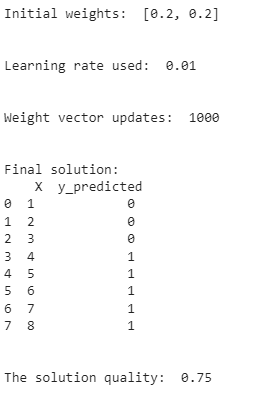

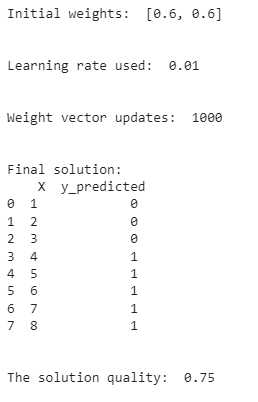

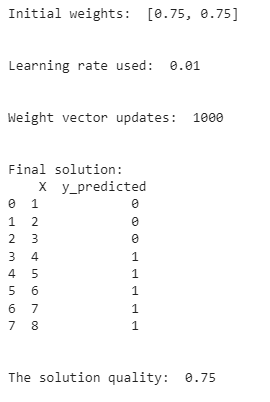

**Part D**


> Predict the chances of a student passing a course if she does not study for (i) 3 weeks, (ii) 5 weeks



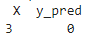

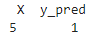

**Part E**

> Can logistic regression be used for classification? If not, explainwhy.If yes, show how your solution in part (a) above would classify the points X = 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5.State assumption(s), if any, that you make



Logistic regression is used for classificaiton problems. Based on the assumptions of our logistic model, points 1,5 through 3.5 will be associated with 0. That is, they pass. Points 4.5 through 7.5 results in a 1, which means they fail. 

**Part F**


> If there were two or more rows in the given data set with the same x–value but different y-values (e.g., (X=3, Y= 1) and (X=3, Y= 0or -1)), would we still be able to obtain a valid logistic regression of Y on X, or would logistic regression make no sense in that case?



 More points will improve its performance, but logistic regression is very efficient when features are linearly separable. On such a small sample size this could disrupt the model. You could still use it, but maybe there are better solutions to deal with conflicting varibles. In my test, it decreased my solution accuracy. 

image.png

# References

https://towardsdatascience.com/logistic-regression-explained-and-implemented-in-python-880955306060


https://www.kdnuggets.com/2020/08/how-neural-networks-learn.html

https://www.baeldung.com/cs/gradient-descent-logistic-regression

I certify that this report is my own, independent work and that it does not 
plagiarize, in part or in full, any other work.